In [8]:
import pandas as pd
from sklearn.cluster import KMeans #导入K均值聚类算法
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data_select = pd.read_csv('./15.csv',encoding = 'gbk')
data_select.index

RangeIndex(start=0, stop=47122, step=1)

In [10]:
data_select.head()

,builiding,flood,room,date,consumption
0,15.0,一层,101.0,2021/3/22,3.25
1,15.0,一层,101.0,2021/3/21,5.85
2,15.0,一层,101.0,2021/3/20,5.40
3,15.0,一层,101.0,2021/3/19,3.85
4,15.0,一层,101.0,2021/3/18,3.90


In [4]:
data_select.dtypes

builiding      float64
flood           object
room           float64
date            object
consumption    float64
dtype: object

In [11]:
group1 = data_select.groupby(['room','date'])['consumption'].mean().unstack()
group1.to_csv('./组2.csv',encoding= 'gbk')

In [12]:
group_select = pd.read_csv('./组2.csv',encoding = 'gbk')

In [13]:
group_select.head()

,room,2021/3/1,2021/3/10,2021/3/11,2021/3/12,2021/3/13,2021/3/14,2021/3/15,2021/3/16,2021/3/17,...,2021/3/20,2021/3/21,2021/3/22,2021/3/3,2021/3/4,2021/3/5,2021/3/6,2021/3/7,2021/3/8,2021/3/9
0,101.0,3.45,5.55,5.65,3.55,NaN,5.35,2.85,3.15,7.85,...,5.40,5.85,3.25,NaN,6.65,5.45,5.35,4.95,6.85,3.60
1,102.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.05,0.00,0.00,0.00,0.00,0.00
2,103.0,6.35,5.90,4.45,4.10,NaN,13.55,11.20,5.85,4.20,...,9.40,15.80,10.60,NaN,7.80,3.95,5.40,22.00,16.45,2.20
3,104.0,3.35,3.35,3.60,0.10,NaN,0.10,0.20,4.70,3.00,...,0.10,0.10,0.10,NaN,0.30,0.10,0.10,0.10,0.10,3.55
4,105.0,3.75,9.10,15.15,10.90,NaN,9.45,11.70,15.20,8.80,...,8.05,13.25,16.35,NaN,16.00,8.10,12.85,17.15,17.85,9.05


In [8]:
isna = group_select.shape[0] - group_select.count()
group_select.count(axis = 1)
#df = df.drop(df[df.score < 50].index)
group_select = group_select.drop(group_select[group_select.count(axis = 1)<150].index)
#group_select.drop(isna > 40)

In [9]:
group_select.to_csv('./15.1.csv',encoding= 'gbk')

In [15]:
new_data = pd.read_csv('./15.1.csv',encoding='gbk')

In [16]:
new_data1 = new_data.stack()
new_data1 = new_data1.unstack(0)

In [17]:
new_data1.fillna(method='pad')

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Unnamed: 0,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,258.00,259.00,260.00,261.00,262.00,263.00,264.00,265.00,266.00,267.00
room,101.00,102.00,104.00,201.00,202.00,203.00,204.00,205.00,206.00,207.00,...,727.00,728.00,729.00,730.00,731.00,735.00,737.00,739.00,743.00,747.00
2020/10/1,1.80,0.50,1.90,0.35,2.85,6.10,2.60,4.30,0.50,5.95,...,3.00,2.30,10.00,0.10,3.25,3.85,8.25,3.75,6.10,8.50
2020/10/10,4.10,4.35,4.05,0.50,2.50,2.45,3.25,3.30,3.80,4.20,...,2.00,0.65,6.70,3.60,5.60,5.45,2.30,2.70,1.85,4.65
2020/10/11,5.35,2.85,4.30,0.40,3.95,5.10,3.25,3.95,3.80,5.25,...,2.15,5.20,8.10,2.55,3.55,3.95,2.30,6.10,1.85,4.40
2020/10/12,2.45,4.95,4.75,5.05,3.60,3.05,5.15,4.70,3.50,4.10,...,2.15,6.90,6.90,0.15,6.35,5.45,3.60,3.35,5.15,4.60
2020/10/14,3.65,4.40,5.70,4.35,3.55,4.70,3.95,3.25,4.70,3.50,...,2.25,0.85,8.45,5.60,3.60,4.15,4.15,3.15,1.70,5.95
2020/10/15,2.90,5.60,3.65,3.50,2.60,3.70,4.30,2.20,4.45,5.00,...,1.95,4.85,5.25,6.55,3.45,4.75,2.75,4.85,2.45,3.60
2020/10/16,2.55,3.15,6.05,3.65,6.70,6.90,3.95,5.25,4.55,5.50,...,2.15,7.20,7.00,5.25,4.90,5.25,0.55,2.80,3.45,2.65
2020/10/17,3.05,0.80,3.40,3.75,2.50,3.05,4.90,2.45,4.60,5.75,...,2.70,1.25,6.95,4.25,2.65,5.15,3.50,5.25,1.90,5.35


In [18]:
new_data2 = new_data1.stack()
new_data2 = new_data2.unstack(0)

In [19]:
new_data2.to_csv('./15.2.csv',encoding='gbk')

In [24]:
data_mean=data_select.mean(axis = 0)
data_std=data_select.std(axis = 0)
#column_select=list(data_mean.index)
data_std_scale=(data_select-data_mean)/data_std

In [42]:
k = 6                       #需要进行的聚类类别数
iteration = 1000             #聚类最大循环数

In [50]:
data_std_scale=data_std_scale.replace(np.nan, 0)
kmodel = KMeans(n_clusters = k, n_jobs = 8, max_iter =1000 ) #n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data_std_scale) #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=10, n_jobs=8, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
r1 = pd.Series(kmodel.labels_).value_counts()  #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_)     #找出聚类中心
r = pd.concat([r2, r1], axis = 1)
r.columns = list(data_std_scale.columns) + [u'类别数目']
r = pd.concat([data_std_scale, pd.Series(kmodel.labels_, index = data_std_scale.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data_std_scale.columns) + [u'聚类类别']
r.head()

,room,floor,year,month,day,consumption,聚类类别
0,-2.031998,-1.909742,0.289551,-0.669339,1.216158,-1.126610,4
1,-2.031998,-1.909742,0.289551,-0.669339,1.322353,-1.116101,4
2,-2.031998,-1.909742,0.289551,-0.669339,1.428548,-1.116101,4
3,-2.031998,-1.909742,0.289551,-0.669339,1.534743,-1.137118,4
4,-2.031998,-1.909742,0.289551,-0.098951,1.109962,-1.084575,4


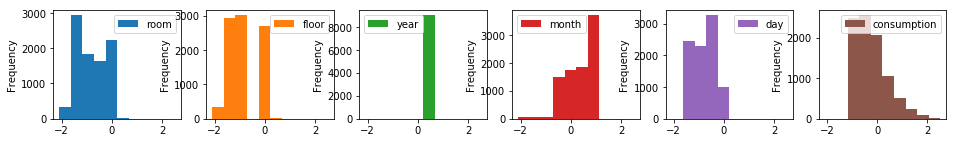

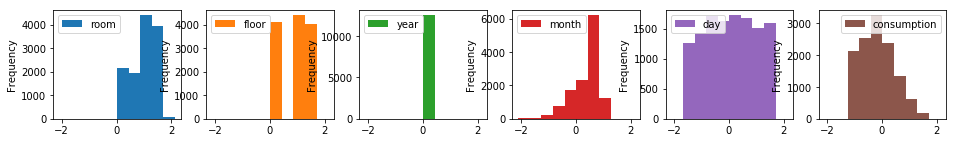

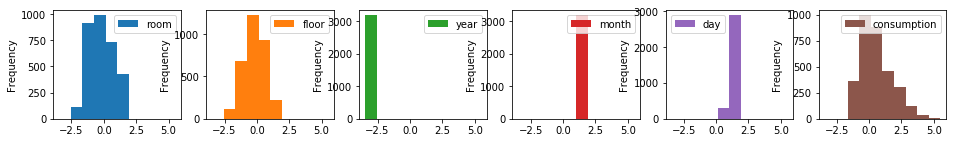

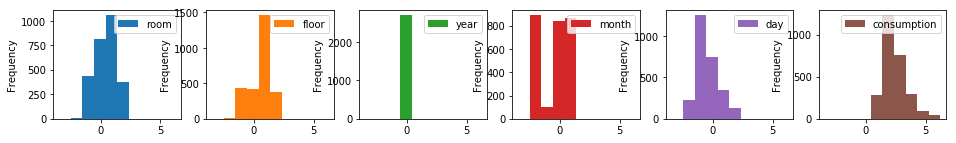

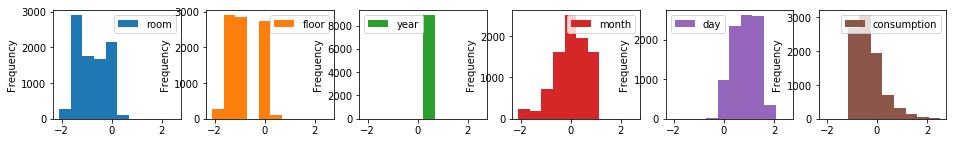

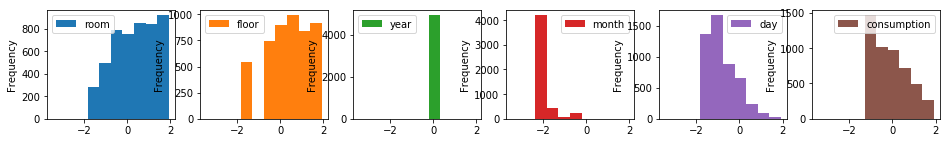

In [52]:
for i in range(k):
    #data_std_scale[r[u'聚类类别']==i].plot(kind='kde', linewidth = 2, subplots = True, sharex = False,layout=(1,data_std_scale.shape[1]),figsize=(16,2))
    data_std_scale[r[u'聚类类别']==i].plot(kind='hist', linewidth = 3, subplots = True, sharex = False,layout=(1,data_std_scale.shape[1]),figsize=(16,2))
    plt.legend()
plt.show()